---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
bbtheory_chars={} 
Penny=''
Raj=''
Sheldon=''
Leonard=''
Howard=''
Amy=''
Bernadette=''

with open("big_bang_transcripts/season_all/merged1-3.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged4-6.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged7-9.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
            
with open("big_bang_transcripts/season_all/merged10.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        if line.startswith('Raj:'):
            Raj=Raj+' '+(line[5:])
        elif line.startswith('Penny:'):
            Penny=Penny+' '+(line[7:])
        elif line.startswith('Sheldon:'):
            Sheldon=Sheldon+' '+(line[9:])
        elif line.startswith('Leonard:'):
            Leonard=Leonard+' '+(line[9:])
        if line.startswith('Howard:'):
            Howard=Howard+' '+(line[8:])
       

bbtheory_chars['Raj']=Raj
bbtheory_chars['Penny']=Penny
bbtheory_chars['Sheldon']=Sheldon
bbtheory_chars['Leonard']=Leonard
bbtheory_chars['Howard']=Howard

In [2]:

import pandas as pd
df1 = pd.DataFrame([x for x in bbtheory_chars['Raj'].split('\n')])

df2 = pd.DataFrame([x for x in bbtheory_chars['Penny'].split('\n')])

df3 = pd.DataFrame([x for x in bbtheory_chars['Sheldon'].split('\n')])
df4 = pd.DataFrame([x for x in bbtheory_chars['Leonard'].split('\n')])

df5 = pd.DataFrame([x for x in bbtheory_chars['Howard'].split('\n')])


In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df1.head()

,0
0,It’s fantastic. Unbelievable.
1,Why?
2,Smooth.
3,Are there any chopsticks?
4,"Also, the pretty girl left."


In [5]:
listOfCharacters1 = [False] *df1.shape[0]
listOfCharacters2 = [False] *df2.shape[0]
listOfCharacters3 = [True] *df3.shape[0]
listOfCharacters4 = [False] *df4.shape[0]
listOfCharacters5 = [False] *df5.shape[0]


In [6]:
df1['Sheldon'] = listOfCharacters1
df2['Sheldon'] = listOfCharacters2 
df3['Sheldon'] = listOfCharacters3
df4['Sheldon'] = listOfCharacters4
df5['Sheldon'] = listOfCharacters5


In [7]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})


In [8]:
df = pd.concat([df1, df2,df3,df4,df5])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Dialogue,Sheldon
0,Hi.,False
1,"No, it doesn’t.",False
2,Since when don’t you want to live with me?,False
3,Why would she do this to me?,True
4,"Well, hear me out.",False


In [9]:
df.head(10)

,Dialogue,Sheldon
0,Hi.,False
1,"No, it doesn’t.",False
2,Since when don’t you want to live with me?,False
3,Why would she do this to me?,True
4,"Well, hear me out.",False
5,"Look, I am in the Halo battle of my life here, there’s this kid in Copenhagen, he has no immune...",False
6,"Howard, I’m sorry… we’re… we’re",False
7,"Fine, go ahead. Take a shot.",False
8,"Hey, you guys have been in there for a while. You doing okay?",False
9,Okay.,False


In [10]:
from io import StringIO
col = [ 'Dialogue','Sheldon']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Sheldon']
category_id_df = df[['Dialogue', 'Sheldon']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Sheldon', 'Dialogue']].values)
df.head(10)


,Dialogue,Sheldon
0,Hi.,False
1,"No, it doesn’t.",False
2,Since when don’t you want to live with me?,False
3,Why would she do this to me?,True
4,"Well, hear me out.",False
5,"Look, I am in the Halo battle of my life here, there’s this kid in Copenhagen, he has no immune...",False
6,"Howard, I’m sorry… we’re… we’re",False
7,"Fine, go ahead. Take a shot.",False
8,"Hey, you guys have been in there for a while. You doing okay?",False
9,Okay.,False


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [12]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

,Dialogue,Sheldon
0,hi,False
1,doesnt,False
2,since dont want live,False
3,would,True
4,well hear,False


In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [14]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 5937 unique tokens.


{'you': 1,
 'i': 2,
 'a': 3,
 'the': 4,
 'to': 5,
 'and': 6,
 'it': 7,
 'of': 8,
 'that': 9,
 'in': 10,
 'my': 11,
 'me': 12,
 'is': 13,
 'i’m': 14,
 'on': 15,
 'what': 16,
 'with': 17,
 'this': 18,
 'for': 19,
 'we': 20,
 'have': 21,
 'oh': 22,
 'like': 23,
 'it’s': 24,
 'so': 25,
 'be': 26,
 'was': 27,
 'do': 28,
 'but': 29,
 'know': 30,
 'your': 31,
 'don’t': 32,
 'no': 33,
 'just': 34,
 'not': 35,
 'are': 36,
 'okay': 37,
 'if': 38,
 'about': 39,
 'well': 40,
 'you’re': 41,
 'can': 42,
 'all': 43,
 'her': 44,
 'uh': 45,
 'yeah': 46,
 'up': 47,
 'how': 48,
 'out': 49,
 'at': 50,
 'that’s': 51,
 'she': 52,
 'get': 53,
 'hey': 54,
 'one': 55,
 'he': 56,
 'right': 57,
 'go': 58,
 'think': 59,
 'want': 60,
 'got': 61,
 'here': 62,
 'did': 63,
 'why': 64,
 'when': 65,
 'good': 66,
 'going': 67,
 'him': 68,
 'come': 69,
 'sheldon': 70,
 'they': 71,
 'from': 72,
 'say': 73,
 'could': 74,
 'an': 75,
 'as': 76,
 'now': 77,
 'can’t': 78,
 'look': 79,
 'guys': 80,
 'see': 81,
 'there': 82,
 'r

In [15]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (38873, 120)


array([[  0,   0,   0, ...,   0,   0, 426],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 322,  60, 544],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 574, 265,  57],
       [  0,   0,   0, ...,   0, 307, 464]], dtype=int32)

In [16]:
Y = pd.get_dummies(df['Sheldon']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(26044, 120) (26044, 2)
(12829, 120) (12829, 2)


In [18]:
X_test


array([[   0,    0,    0, ...,    0,   55, 1245],
       [   0,    0,    0, ...,   60,   69,  110],
       [   0,    0,    0, ...,    0,  782,  279],
       ...,
       [   0,    0,    0, ..., 5036,   83,  185],
       [   0,    0,    0, ...,  120,  208,  118],
       [   0,    0,    0, ...,  104,  228,  196]], dtype=int32)

In [19]:
Y_test


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [20]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [21]:
X.shape[1]

120

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1102 13:40:32.824809 4705869248 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 23439 samples, validate on 2605 samples
Epoch 1/10
23439/23439 [==============================] - 27s 1ms/sample - loss: 0.5654 - accuracy: 0.7214 - val_loss: 0.4943 - val_accuracy: 0.7628
Epoch 2/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 0.4999 - accuracy: 0.7634 - val_loss: 0.5072 - val_accuracy: 0.7585
Epoch 3/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 0.4722 - accuracy: 0.7840 - val_loss: 0.5180 - val_accuracy: 0.7582
Epoch 4/10
23439/23439 [==============================] - 26s 1ms/sample - loss: 0.4502 - accuracy: 0.7951 - val_loss: 0.5348 - val_accuracy: 0.7539


In [80]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 23439 samples, validate on 2605 samples
Epoch 1/10
23439/23439 [==============================] - 65s 3ms/sample - loss: 0.5557 - accuracy: 0.7284 - val_loss: 0.5351 - val_accuracy: 0.7455
Epoch 2/10
23439/23439 [==============================] - 65s 3ms/sample - loss: 0.4845 - accuracy: 0.7719 - val_loss: 0.5437 - val_accuracy: 0.7386
Epoch 3/10
23439/23439 [==============================] - 67s 3ms/sample - loss: 0.4484 - accuracy: 0.7961 - val_loss: 0.5518 - val_accuracy: 0.7367
Epoch 4/10
23439/23439 [==============================] - 68s 3ms/sample - loss: 0.4210 - accuracy: 0.8124 - val_loss: 0.5845 - val_accuracy: 0.7357


In [24]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12829/12829 [==============================] - 8s 594us/sample - loss: 0.5606 - accuracy: 0.7347
Test set
  Loss: 0.561
  Accuracy: 0.735


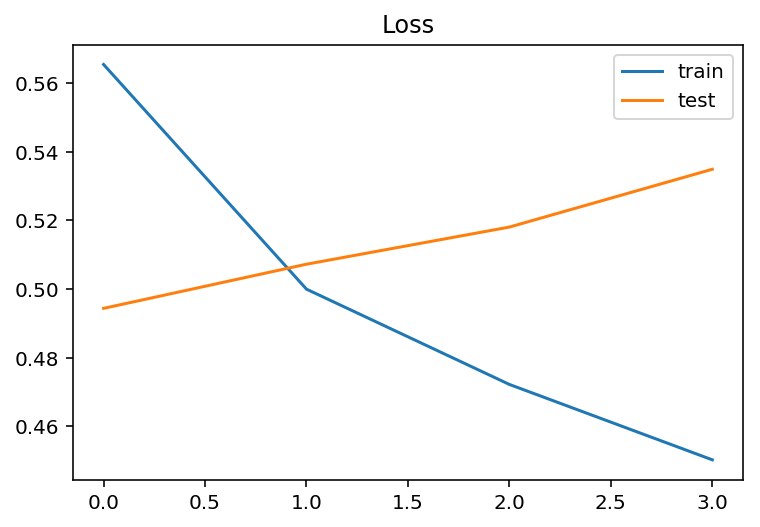

In [25]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [26]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[0.6609758 , 0.3390242 ],
       [0.5982262 , 0.40177384],
       [0.70270544, 0.29729456],
       ...,
       [0.9715707 , 0.02842936],
       [0.5704505 , 0.4295495 ],
       [0.7928386 , 0.20716137]], dtype=float32)

In [27]:
Y_test


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [28]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 0 0 ... 0 0 0]


In [29]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[1 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



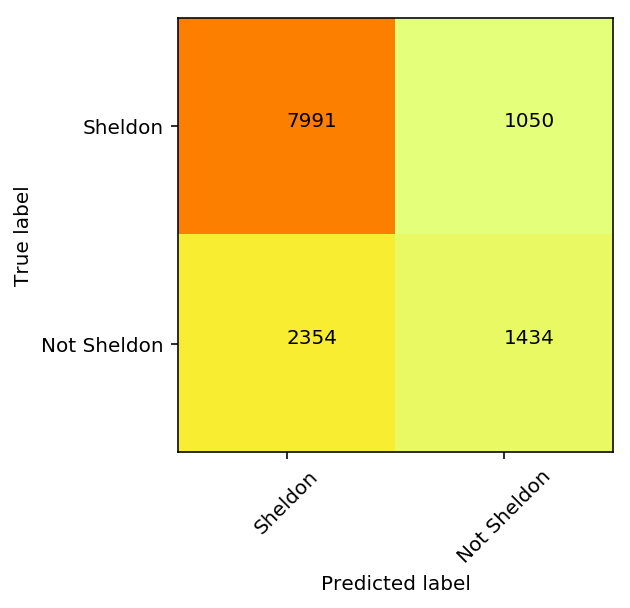

In [31]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Sheldon','Not Sheldon']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()

In [32]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Sheldon', 'Not Sheldon']
print(classification_report(y_true, y_pred, target_names=target_names))
    ### -------this is the end------

              precision    recall  f1-score   support

     Sheldon       0.77      0.88      0.82      9041
 Not Sheldon       0.58      0.38      0.46      3788

    accuracy                           0.73     12829
   macro avg       0.67      0.63      0.64     12829
weighted avg       0.71      0.73      0.72     12829



In [39]:
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 1 1 0]


In [40]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [42]:
y_pred1=clf.predict(X_test)

In [43]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

9


In [44]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Sheldon', 'Not Sheldon']
print(classification_report(y_true, y_pred1, target_names=target_names))

TypeError: Singleton array 9 cannot be considered a valid collection.